In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data_for_predictions.csv")
df.drop(columns=["Unnamed: 0"], inplace=True)

In [3]:
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,...,2,6,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,...,76,4,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,...,68,8,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,...,69,9,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,40.606701,...,71,9,1,0,0,0,0,1,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 63 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   id                                          14606 non-null  object 
 1   cons_12m                                    14606 non-null  float64
 2   cons_gas_12m                                14606 non-null  float64
 3   cons_last_month                             14606 non-null  float64
 4   forecast_cons_12m                           14606 non-null  float64
 5   forecast_discount_energy                    14606 non-null  float64
 6   forecast_meter_rent_12m                     14606 non-null  float64
 7   forecast_price_energy_off_peak              14606 non-null  float64
 8   forecast_price_energy_peak                  14606 non-null  float64
 9   forecast_price_pow_off_peak                 14606 non-null  float64
 10  has_gas   

In [5]:
df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
count,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,...,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,4.223939,0.779244,2.264646,2.962177,0.966726,1.517203,0.137283,0.050491,43.130056,0.181501,...,35.464056,4.910516,0.255032,0.061139,0.462413,0.126181,0.094139,0.293989,0.215528,0.485896
std,0.884515,1.717071,1.769305,0.683592,5.108289,0.571481,0.024623,0.049037,4.485988,0.385446,...,30.248229,3.795906,0.435894,0.239594,0.498602,0.332065,0.292033,0.455602,0.411202,0.499818
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.754023,0.000000,0.000000,2.695477,0.000000,1.235023,0.116340,0.000000,40.606701,0.000000,...,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.149727,0.000000,2.899547,3.046836,0.000000,1.296555,0.143166,0.084138,44.311378,0.000000,...,30.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.610285,0.000000,3.529430,3.380716,0.000000,2.120673,0.146348,0.098837,44.311378,0.000000,...,64.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,6.792889,6.618528,5.887169,4.918575,30.000000,2.778376,0.273963,0.195975,59.266378,1.000000,...,151.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
#Target/Label ---> This represents churn 
df['churn'] 

0        1
1        0
2        0
3        0
4        0
        ..
14601    0
14602    1
14603    1
14604    0
14605    0
Name: churn, Length: 14606, dtype: int64

In [8]:
df.isnull().sum()

id                                            0
cons_12m                                      0
cons_gas_12m                                  0
cons_last_month                               0
forecast_cons_12m                             0
                                             ..
channel_lmkebamcaaclubfxadlmueccxoimlema      0
channel_usilxuppasemubllopkaafesmlibmsdf      0
origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws    0
origin_up_ldkssxwpmemidmecebumciepifcamkci    0
origin_up_lxidpiddsbxsbosboudacockeimpuepw    0
Length: 63, dtype: int64

### EDA

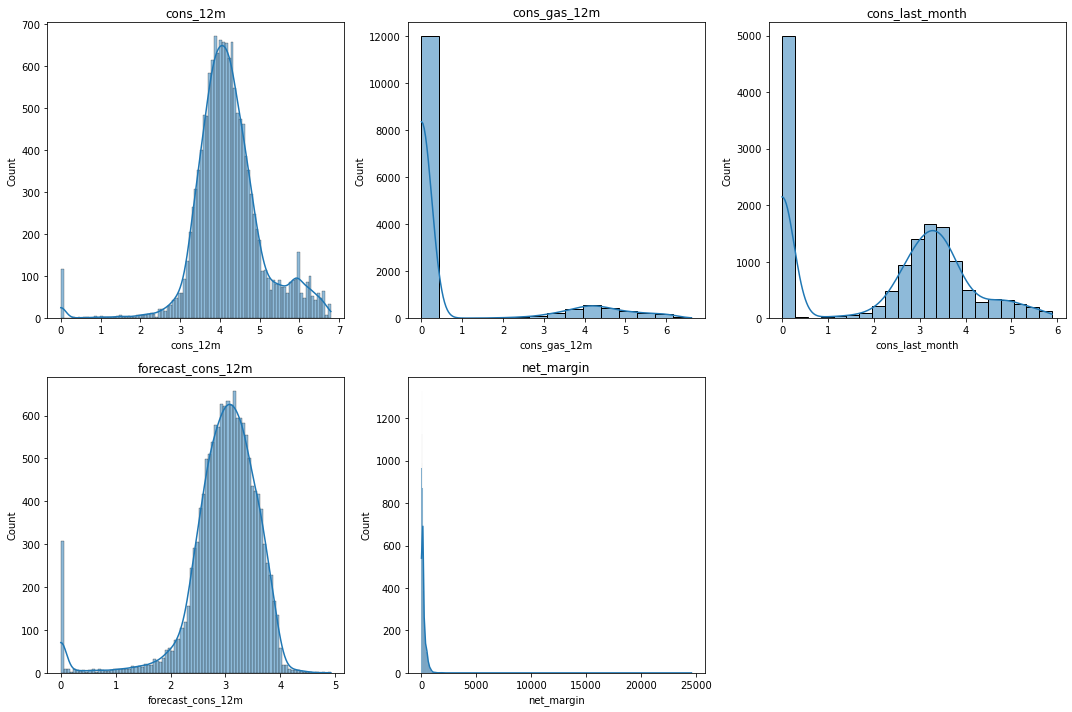

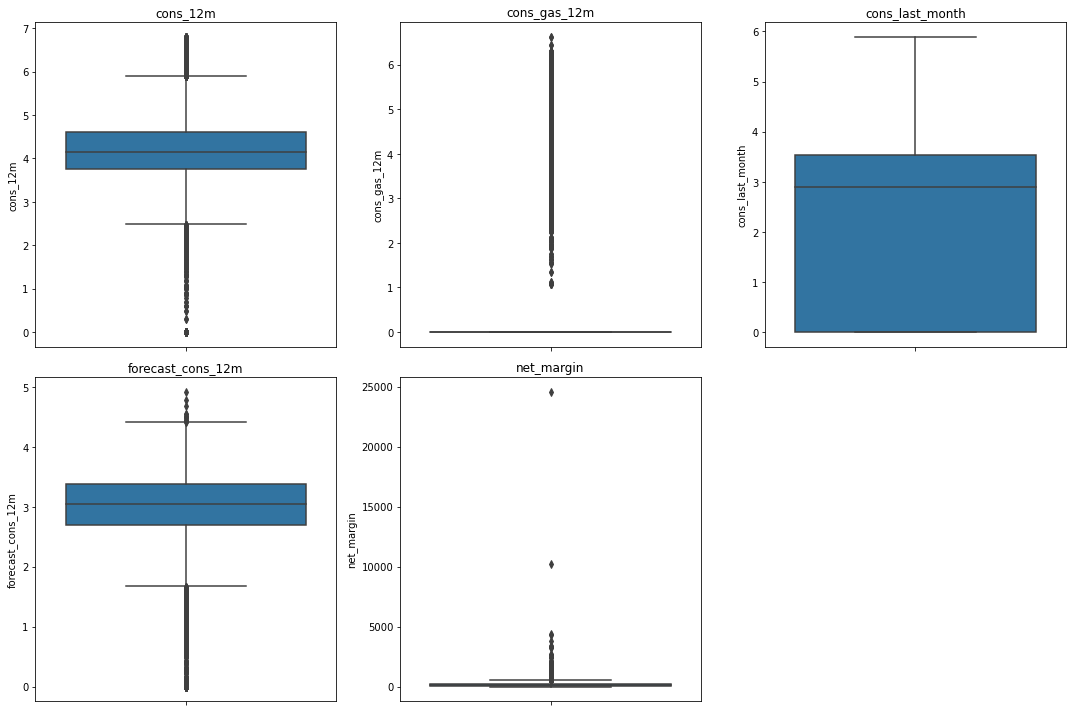

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
count,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,...,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,4.223939,0.779244,2.264646,2.962177,0.966726,1.517203,0.137283,0.050491,43.130056,0.181501,...,35.464056,4.910516,0.255032,0.061139,0.462413,0.126181,0.094139,0.293989,0.215528,0.485896
std,0.884515,1.717071,1.769305,0.683592,5.108289,0.571481,0.024623,0.049037,4.485988,0.385446,...,30.248229,3.795906,0.435894,0.239594,0.498602,0.332065,0.292033,0.455602,0.411202,0.499818
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.754023,0.000000,0.000000,2.695477,0.000000,1.235023,0.116340,0.000000,40.606701,0.000000,...,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.149727,0.000000,2.899547,3.046836,0.000000,1.296555,0.143166,0.084138,44.311378,0.000000,...,30.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.610285,0.000000,3.529430,3.380716,0.000000,2.120673,0.146348,0.098837,44.311378,0.000000,...,64.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,6.792889,6.618528,5.887169,4.918575,30.000000,2.778376,0.273963,0.195975,59.266378,1.000000,...,151.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
# Statistical Summary of Numerical Variables
statistical_summary = df.describe()

# Visualizations setup
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting a subset of numerical columns for visualization to avoid clutter
numerical_columns_subset = ['cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_12m', 'net_margin']

# Histograms for the subset of numerical variables
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns_subset, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(column)

plt.tight_layout()
plt.show()

# Boxplots for the subset of numerical variables to check for outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns_subset, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

statistical_summary


churn                                         1.000000
margin_net_pow_ele                            0.095772
margin_gross_pow_ele                          0.095725
origin_up_lxidpiddsbxsbosboudacockeimpuepw    0.094131
channel_foosdfpfkusacimwkcsosbicdxkicaua      0.075964
                                                ...   
months_modif_prod                            -0.052120
channel_lmkebamcaaclubfxadlmueccxoimlema     -0.052946
tenure                                       -0.072409
months_activ                                 -0.074797
origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws   -0.080766
Name: churn, Length: 62, dtype: float64

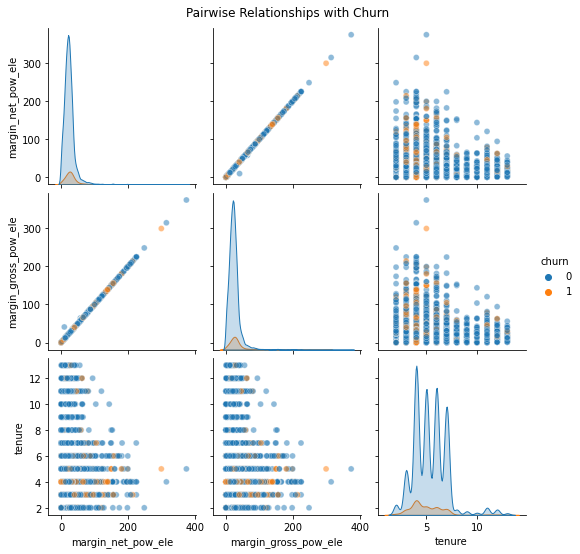

In [16]:
# Selecting a subset of variables for the pair plot
variables_subset = ['churn', 'margin_net_pow_ele', 'margin_gross_pow_ele', 'tenure']

# Pair Plot including the 'churn' variable to observe pairwise relationships
sns.pairplot(df[variables_subset], hue='churn', plot_kws={'alpha': 0.5})
plt.suptitle('Pairwise Relationships with Churn', y=1.02)  # Adjust title position
plt.show()


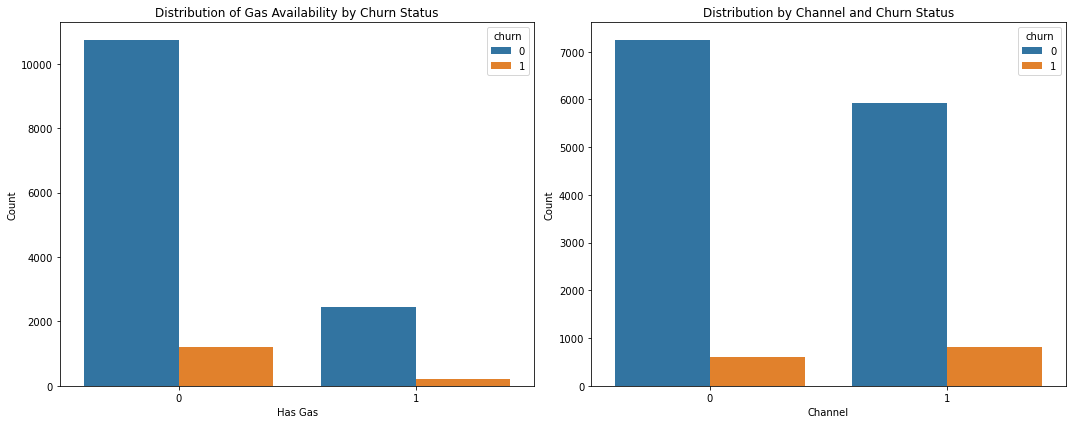

In [20]:
# Setting up the count plots for categorical variables
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Count Plot for 'has_gas'
sns.countplot(x='has_gas', hue='churn', data=df, ax=ax[0])
ax[0].set_title('Distribution of Gas Availability by Churn Status')
ax[0].set_xlabel('Has Gas')
ax[0].set_ylabel('Count')

# Selecting one of the channel variables for visualization
channel_var = 'channel_foosdfpfkusacimwkcsosbicdxkicaua'
sns.countplot(x=channel_var, hue='churn', data=df, ax=ax[1])
ax[1].set_title('Distribution by Channel and Churn Status')
ax[1].set_xlabel('Channel')
ax[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


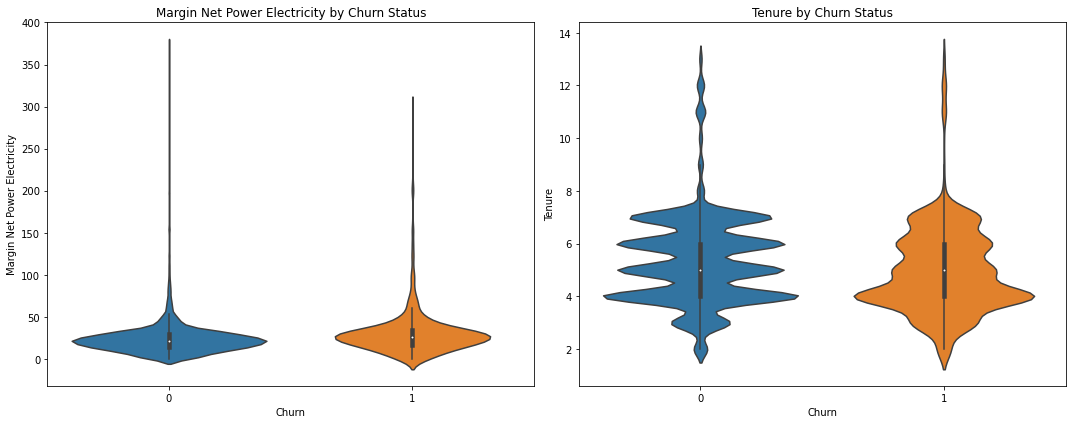

In [21]:
# Setting up the violin plots for numerical variables against churn
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Violin Plot for 'margin_net_pow_ele'
sns.violinplot(x='churn', y='margin_net_pow_ele', data=df, ax=ax[0])
ax[0].set_title('Margin Net Power Electricity by Churn Status')
ax[0].set_xlabel('Churn')
ax[0].set_ylabel('Margin Net Power Electricity')

# Violin Plot for 'tenure'
sns.violinplot(x='churn', y='tenure', data=df, ax=ax[1])
ax[1].set_title('Tenure by Churn Status')
ax[1].set_xlabel('Churn')
ax[1].set_ylabel('Tenure')

plt.tight_layout()
plt.show()


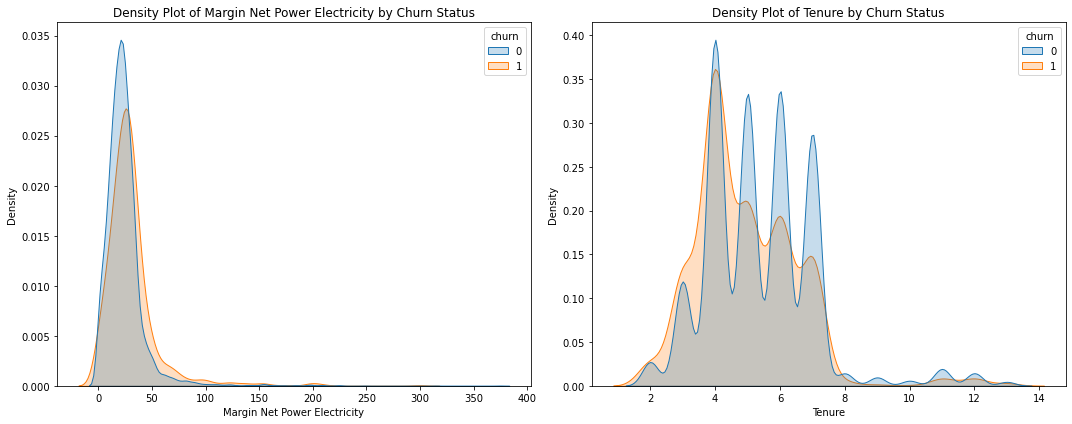

In [22]:
# Setting up the density plots for 'margin_net_pow_ele' and 'tenure'
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Density Plot for 'margin_net_pow_ele'
sns.kdeplot(data=df, x='margin_net_pow_ele', hue='churn', fill=True, common_norm=False, ax=ax[0])
ax[0].set_title('Density Plot of Margin Net Power Electricity by Churn Status')
ax[0].set_xlabel('Margin Net Power Electricity')
ax[0].set_ylabel('Density')

# Density Plot for 'tenure'
sns.kdeplot(data=df, x='tenure', hue='churn', fill=True, common_norm=False, ax=ax[1])
ax[1].set_title('Density Plot of Tenure by Churn Status')
ax[1].set_xlabel('Tenure')
ax[1].set_ylabel('Density')

plt.tight_layout()
plt.show()

### Co-relation

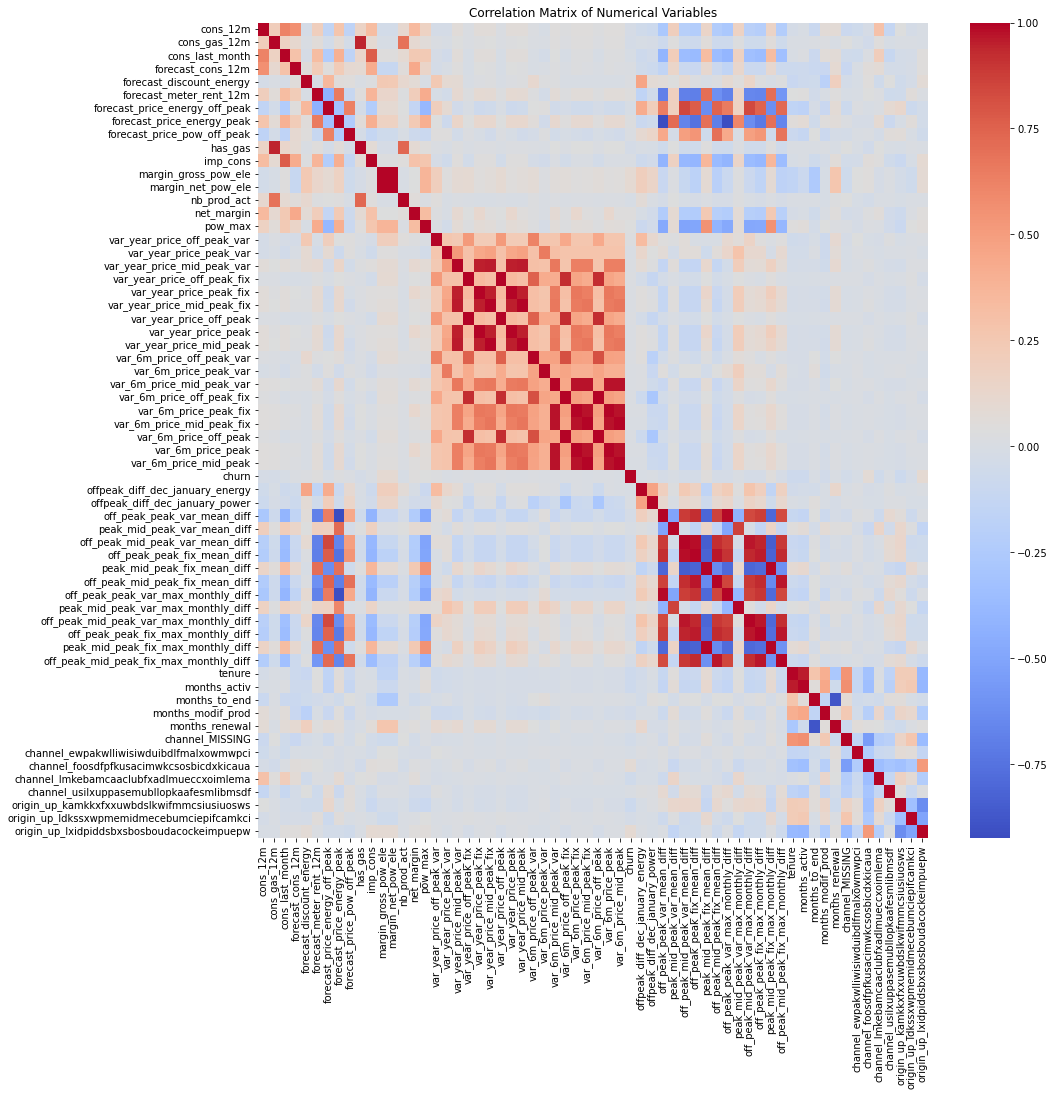

In [31]:
# Correlation matrix computation
correlation_matrix = df.corr()

# Heatmap visualization of the correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

In [32]:
# Correlation of all features with the 'churn' variable
churn_correlation = df.corr()['churn'].sort_values(ascending=False)

churn_correlation

churn                                         1.000000
margin_net_pow_ele                            0.095772
margin_gross_pow_ele                          0.095725
origin_up_lxidpiddsbxsbosboudacockeimpuepw    0.094131
channel_foosdfpfkusacimwkcsosbicdxkicaua      0.075964
                                                ...   
months_modif_prod                            -0.052120
channel_lmkebamcaaclubfxadlmueccxoimlema     -0.052946
tenure                                       -0.072409
months_activ                                 -0.074797
origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws   -0.080766
Name: churn, Length: 62, dtype: float64

### Train - Test Split

In [47]:
X = df.drop(['id','churn'],axis=1)
y = df['churn']

In [48]:
#df.shape

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [50]:
print("Shape of X train is:",X_train.shape)
print("Shape of y train is:",y_train.shape)
print("Shape of X test is:",X_test.shape)
print("Shape of y test is:",y_test.shape)

Shape of X train is: (10954, 61)
Shape of y train is: (10954,)
Shape of X test is: (3652, 61)
Shape of y test is: (3652,)


In [62]:
df['churn'].value_counts()

0    13187
1     1419
Name: churn, dtype: int64

#### This is imbalanced data, lets Oversample it by using SMOTE

In [63]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=8)

In [64]:
X_smote,y_smote = smote.fit_resample(X_train,y_train)

In [66]:
print(X_smote.shape)
print(y_smote.shape)

(19802, 61)
(19802,)


In [67]:
y_smote.value_counts()

1    9901
0    9901
Name: churn, dtype: int64

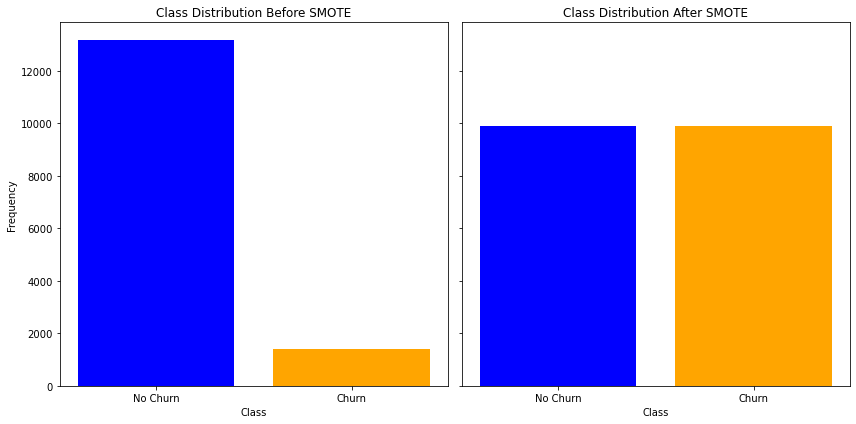

In [68]:
# Re-importing necessary libraries and redefining variables for plotting after code execution reset
import matplotlib.pyplot as plt
from collections import Counter

# Dummy values for illustration, as the actual resampling cannot be redone due to the reset
# Replace these with your actual 'y_train' and 'y_smote' value counts
class_distribution_before = Counter({0: 13187, 1: 1419})  # Example before SMOTE
class_distribution_after = Counter({0: 9901, 1: 9901})  # Example after SMOTE, assuming perfect balance

# Setting up the bar chart
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Bar chart for class distribution before SMOTE
ax[0].bar(class_distribution_before.keys(), class_distribution_before.values(), color=['blue', 'orange'])
ax[0].set_title('Class Distribution Before SMOTE')
ax[0].set_xlabel('Class')
ax[0].set_ylabel('Frequency')
ax[0].set_xticks([0, 1])
ax[0].set_xticklabels(['No Churn', 'Churn'])

# Bar chart for class distribution after SMOTE
ax[1].bar(class_distribution_after.keys(), class_distribution_after.values(), color=['blue', 'orange'])
ax[1].set_title('Class Distribution After SMOTE')
ax[1].set_xlabel('Class')
ax[1].set_xticks([0, 1])
ax[1].set_xticklabels(['No Churn', 'Churn'])

plt.tight_layout()
plt.show()


Now that we have balanced train data, we can proceed for modelling..✨

## Modelling

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lg
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report

### 1. Logistic Regression

In [69]:
lr = LogisticRegression()

model1 = lr.fit(X_smote,y_smote)

C:\Users\Welcome\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [70]:
y_pred1 = model1.predict(X_test)

In [71]:
len(y_pred1)

3652

In [72]:
print("Accuracy score of Logistic Regression is:",accuracy_score(y_test,y_pred1))
print("Precision score of Logistic Regression is:",precision_score(y_test,y_pred1))
print("recall score of Logistic Regression is:",recall_score(y_test,y_pred1))

Accuracy score of Logistic Regression is: 0.7349397590361446
Precision score of Logistic Regression is: 0.13559322033898305
recall score of Logistic Regression is: 0.30601092896174864


In [73]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.91      0.78      0.84      3286
           1       0.14      0.31      0.19       366

    accuracy                           0.73      3652
   macro avg       0.52      0.54      0.51      3652
weighted avg       0.83      0.73      0.78      3652



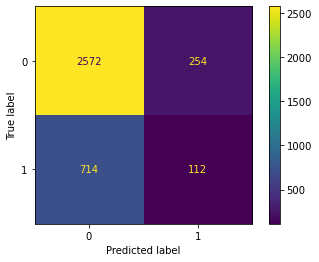

In [79]:
from sklearn.metrics import ConfusionMatrixDisplay

print(ConfusionMatrixDisplay.from_predictions(y_pred1,y_test))

### 2. K - Nearest Neighbors

In [90]:
knn = KNeighborsClassifier(n_neighbors=3)

model2 = knn.fit(X_smote,y_smote)

In [91]:
y_pred2 = model2.predict(X_test)

In [92]:
print("Accuracy score of K-Nearest Neighbors is:",accuracy_score(y_test,y_pred2))
print("Precision score of K-Nearest Neighbors is:",precision_score(y_test,y_pred2))
print("recall score of K-Nearest Neighbors is:",recall_score(y_test,y_pred2))

Accuracy score of K-Nearest Neighbors is: 0.721248630887185
Precision score of K-Nearest Neighbors is: 0.13452914798206278
recall score of K-Nearest Neighbors is: 0.32786885245901637


In [93]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.91      0.77      0.83      3286
           1       0.13      0.33      0.19       366

    accuracy                           0.72      3652
   macro avg       0.52      0.55      0.51      3652
weighted avg       0.83      0.72      0.77      3652



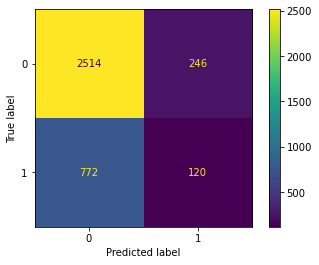

In [94]:
print(ConfusionMatrixDisplay.from_predictions(y_pred2,y_test))

Observation: by reducing "n_neighbors", accuracy is getting increased

### 3. Random Forest Classifier

In [101]:
rf = RandomForestClassifier(n_estimators=1000)

model3 = rf.fit(X_smote,y_smote)

In [102]:
y_pred3 = model3.predict(X_test)

In [103]:
print("Accuracy score of Random Forest Classifier is:",accuracy_score(y_test,y_pred3))
print("Precision score of Random Forest Classifier is:",precision_score(y_test,y_pred3))
print("recall score of Random Forest Classifier is:",recall_score(y_test,y_pred3))

Accuracy score of Random Forest Classifier is: 0.9014238773274917
Precision score of Random Forest Classifier is: 0.5441176470588235
recall score of Random Forest Classifier is: 0.10109289617486339


In [104]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      3286
           1       0.54      0.10      0.17       366

    accuracy                           0.90      3652
   macro avg       0.73      0.55      0.56      3652
weighted avg       0.87      0.90      0.87      3652



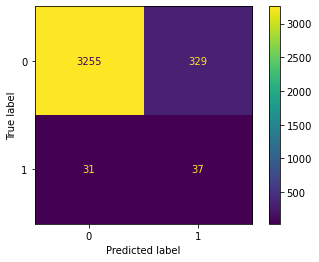

In [105]:
print(ConfusionMatrixDisplay.from_predictions(y_pred3,y_test))

### 4. XGBOOST Classifier

In [107]:
xg = xgb.XGBClassifier(n_estimators=1000,learning_rate=0.01)

model4 = xg.fit(X_smote,y_smote)

In [108]:
y_pred4 = model4.predict(X_test)

In [109]:
print("Accuracy score of XGBoost Classifier is:",accuracy_score(y_test,y_pred4))
print("Precision score of XGBoost Classifier is:",precision_score(y_test,y_pred4))
print("recall score of XGBoost Classifier is:",recall_score(y_test,y_pred4))

Accuracy score of XGBoost Classifier is: 0.8975903614457831
Precision score of XGBoost Classifier is: 0.45652173913043476
recall score of XGBoost Classifier is: 0.11475409836065574


In [110]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      3286
           1       0.46      0.11      0.18       366

    accuracy                           0.90      3652
   macro avg       0.68      0.55      0.56      3652
weighted avg       0.86      0.90      0.87      3652



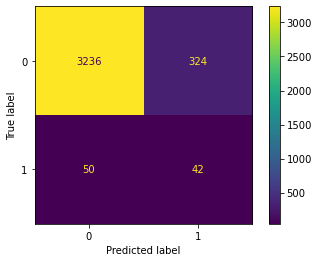

In [111]:
print(ConfusionMatrixDisplay.from_predictions(y_pred4,y_test))

### 5. Light Gradient Boosting Classifier (LightGBM)

In [112]:
lg = lg.LGBMClassifier(n_estimators=1000,learning_rate=0.001,min_child_samples=50,num_leaves=10)

model5 = lg.fit(X_smote,y_smote)

In [113]:
y_pred5 = model5.predict(X_test)

In [114]:
print("Accuracy score of LGBM Classifier is:",accuracy_score(y_test,y_pred5))
print("Precision score of LGBM Classifier is:",precision_score(y_test,y_pred5))
print("recall score of LGBM Classifier is:",recall_score(y_test,y_pred5))

Accuracy score of LGBM Classifier is: 0.8493975903614458
Precision score of LGBM Classifier is: 0.18275862068965518
recall score of LGBM Classifier is: 0.1448087431693989


In [115]:
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      3286
           1       0.18      0.14      0.16       366

    accuracy                           0.85      3652
   macro avg       0.54      0.54      0.54      3652
weighted avg       0.83      0.85      0.84      3652



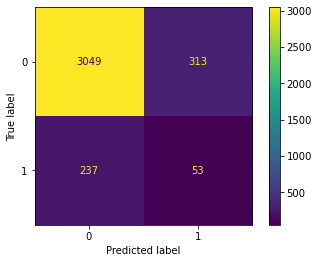

In [116]:
print(ConfusionMatrixDisplay.from_predictions(y_pred5,y_test))

Conclusion: from the above observations, Random forest Classifier is performing well in terms of all metrics🧗🏻‍

### Feature Importance

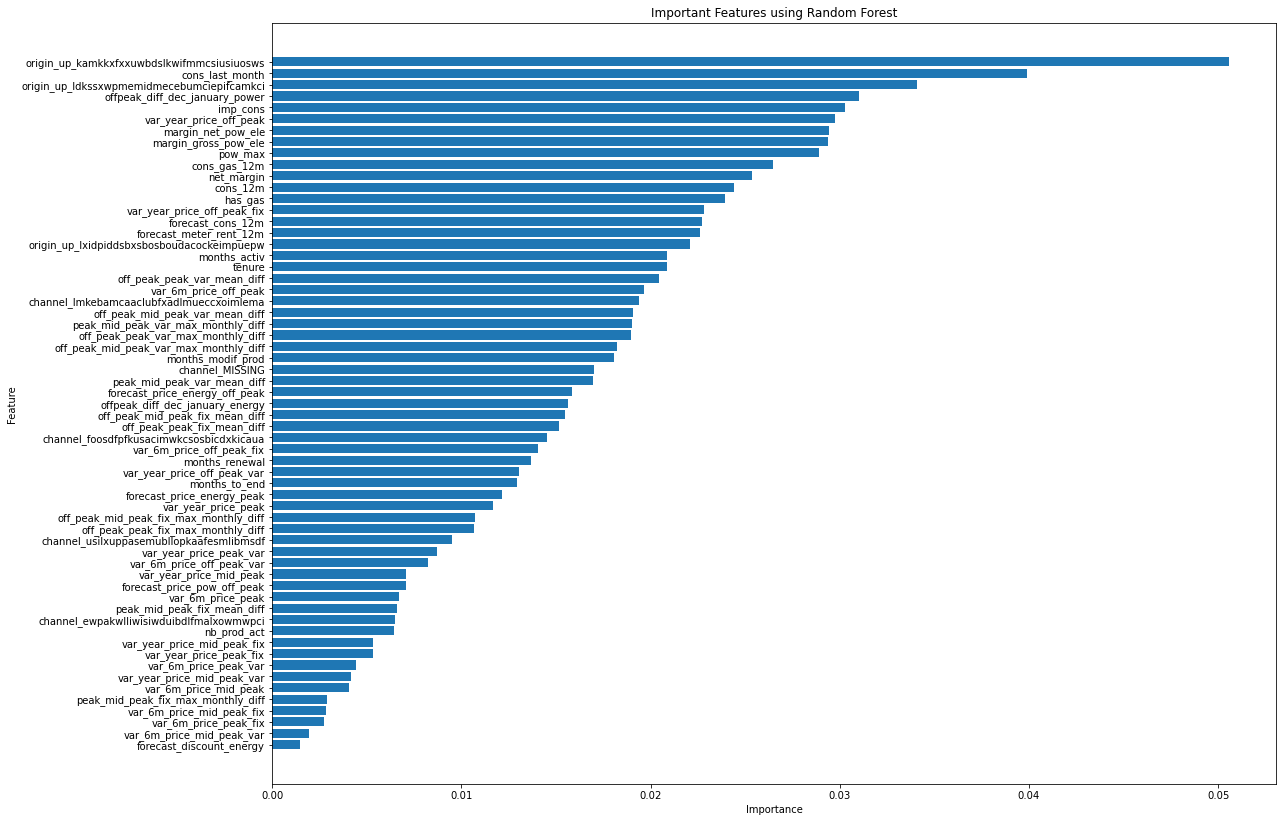

In [121]:
importances = model3.feature_importances_

feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': importances})

feature_importances = feature_importances.sort_values('importance', ascending=False)

#plotting important features
plt.figure(figsize=(18,14))
plt.barh(feature_importances['feature'], feature_importances['importance'])
plt.title("Important Features using Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.gca().invert_yaxis()
plt.show()